# Data Preprocessing

In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn (1).csv")

# Step 3: Preview dataset
print("Shape:", df.shape)
df.head()


Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
# Check column data types and missing values
df.info()

# Check for total missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [3]:
# There may be spaces in 'TotalCharges' column that cause errors
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Now check missing values again
df.isnull().sum()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [4]:
df = df.dropna()
df.reset_index(drop=True, inplace=True)


In [5]:
df.drop('customerID', axis=1, inplace=True)  # Not useful for prediction


In [6]:
# Identify categorical columns
cat_cols = df.select_dtypes(include='object').columns.tolist()
print(cat_cols)


['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [7]:
from sklearn.preprocessing import LabelEncoder

# Binary columns — encode as 0 and 1
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

# One-hot encode remaining categorical columns
df = pd.get_dummies(df, drop_first=True)


In [8]:
# Separate features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show final shape
print("Training shape:", X_train.shape)
print("Test shape:", X_test.shape)


Training shape: (5625, 30)
Test shape: (1407, 30)


# Exploratory Data Analysis (EDA)


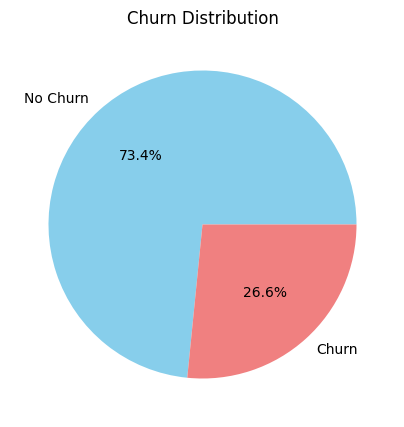

In [9]:
# Pie chart for churn
churn_counts = df['Churn'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(churn_counts, labels=['No Churn', 'Churn'], autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Churn Distribution')
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_4932\2568742391.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='Set2')
C:\Users\USER\AppData\Local\Temp\ipykernel_4932\2568742391.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='Set2')
C:\Users\USER\AppData\Local\Temp\ipykernel_4932\2568742391.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='Set2')


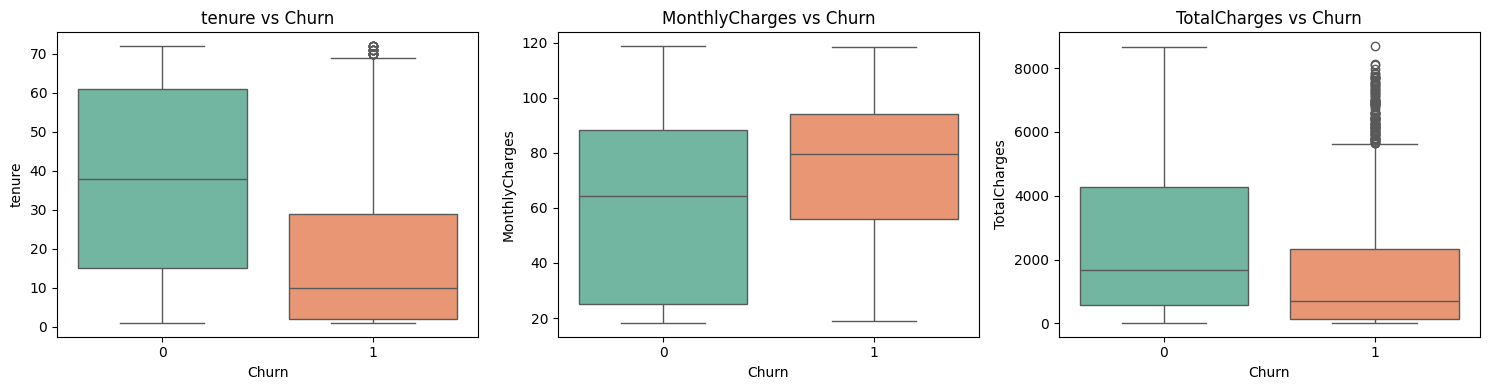

In [10]:
# Boxplots of numerical features vs Churn
numerical = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(15, 4))
for i, col in enumerate(numerical):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x='Churn', y=col, data=df, palette='Set2')
    plt.title(f'{col} vs Churn')

plt.tight_layout()
plt.show()


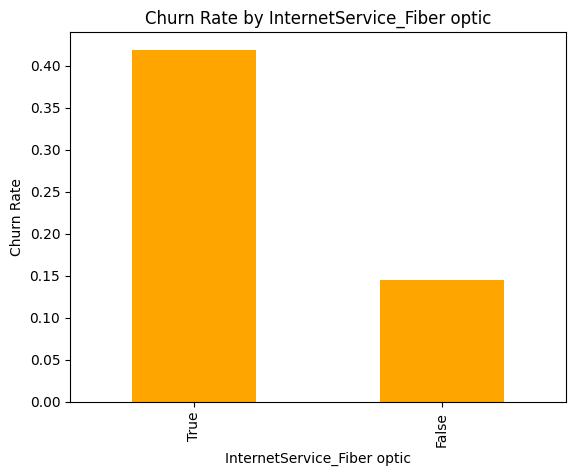

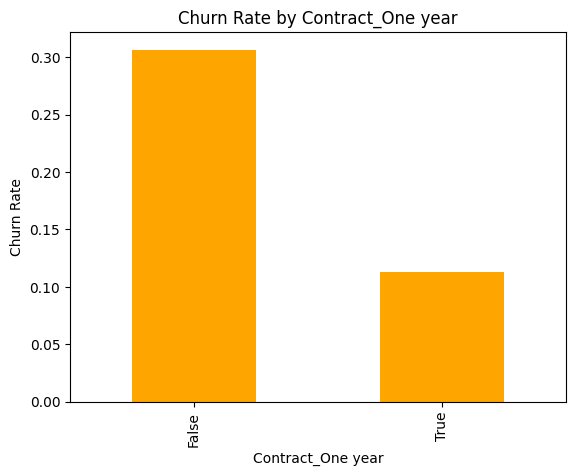

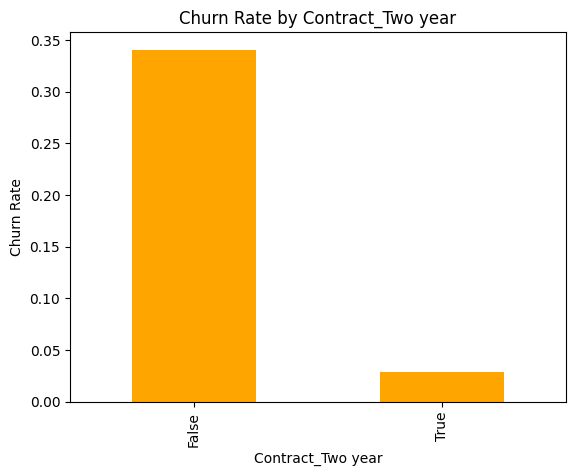

In [11]:
# Define function to plot churn rate by category
def plot_churn_by_category(col):
    churn_rate = df.groupby(col)['Churn'].mean().sort_values(ascending=False)
    churn_rate.plot(kind='bar', color='orange')
    plt.title(f'Churn Rate by {col}')
    plt.ylabel('Churn Rate')
    plt.show()

# Example: InternetService
plot_churn_by_category('InternetService_Fiber optic')
plot_churn_by_category('Contract_One year')
plot_churn_by_category('Contract_Two year')


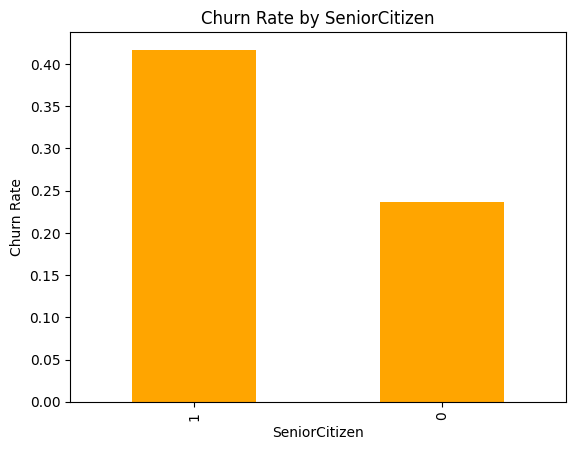

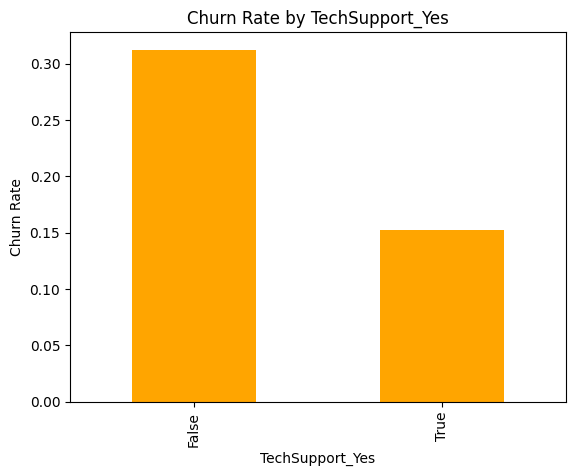

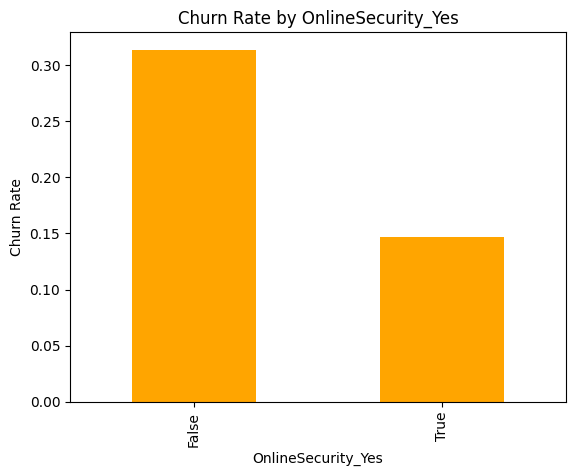

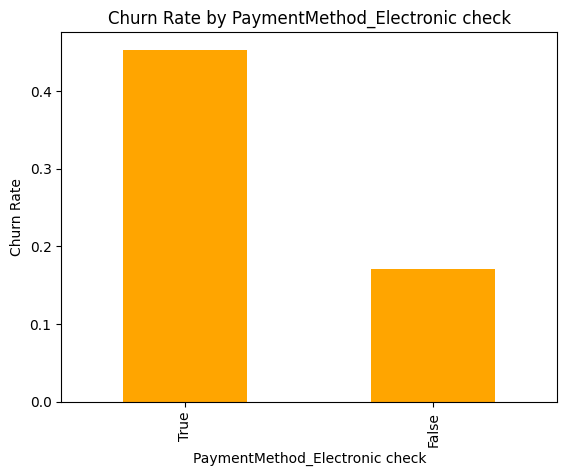

In [12]:
plot_churn_by_category('SeniorCitizen')
plot_churn_by_category('TechSupport_Yes')
plot_churn_by_category('OnlineSecurity_Yes')
plot_churn_by_category('PaymentMethod_Electronic check')


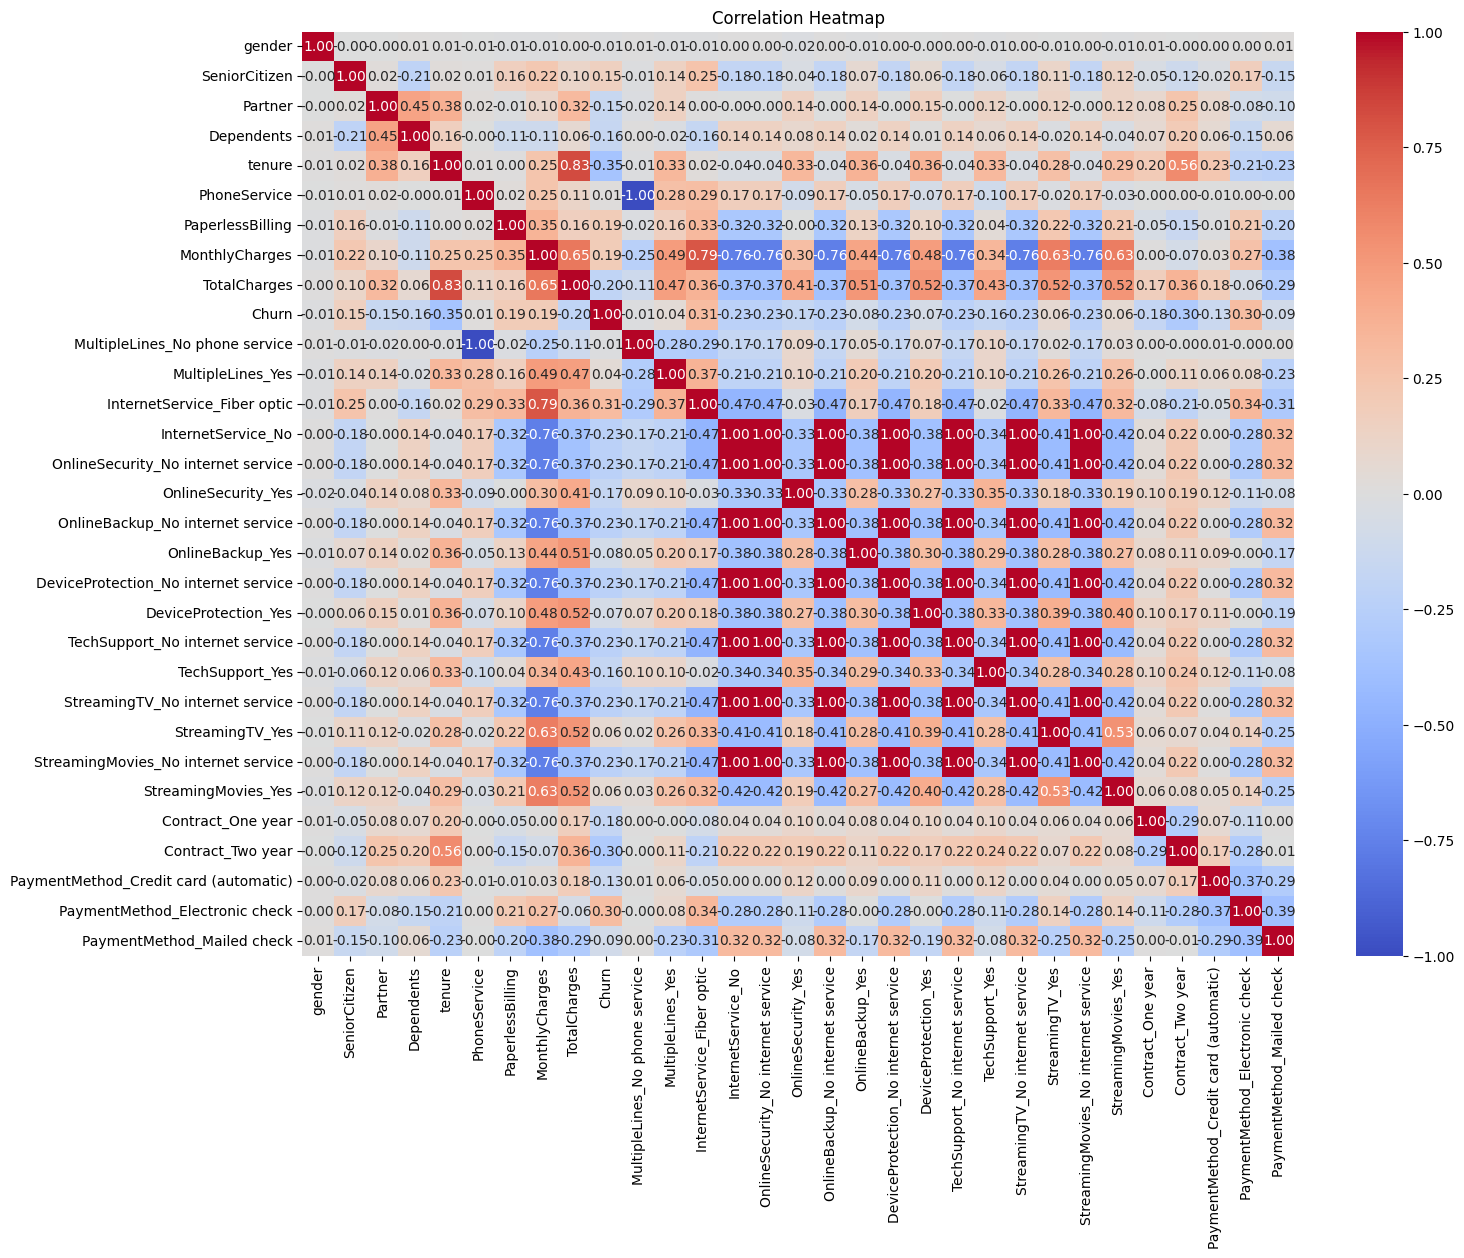

In [13]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# Model Building

In [14]:
# If not done already:
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    print("Accuracy:", round(acc, 4))
    print("ROC AUC Score:", round(auc, 4))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
    plt.plot([0,1], [0,1], linestyle='--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid()
    plt.show()


🔍 Logistic Regression Results
Accuracy: 0.7868
ROC AUC Score: 0.8321

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.86      1033
           1       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


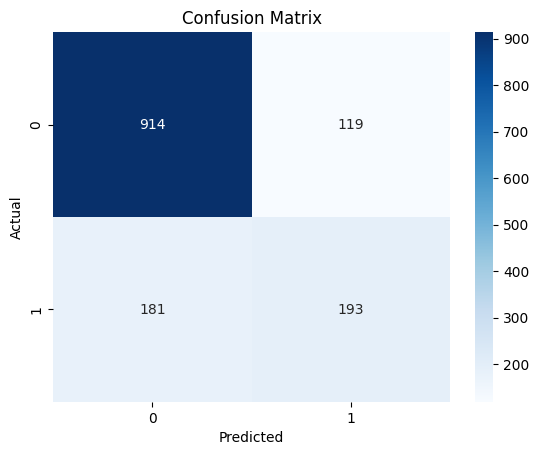

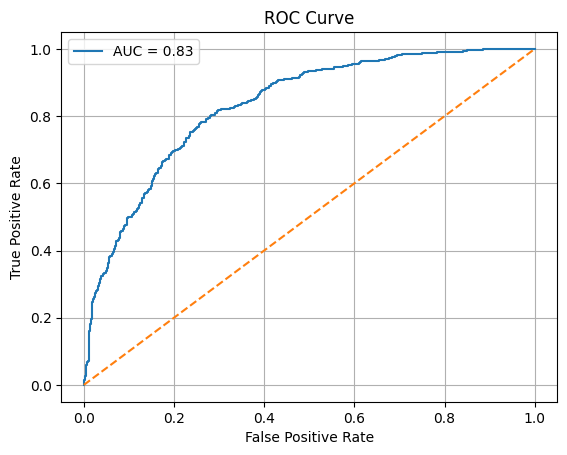

In [16]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

print("🔍 Logistic Regression Results")
evaluate_model(logreg, X_test, y_test)


🌲 Random Forest Results
Accuracy: 0.7882
ROC AUC Score: 0.8173

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      1033
           1       0.64      0.46      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.77      0.79      0.78      1407



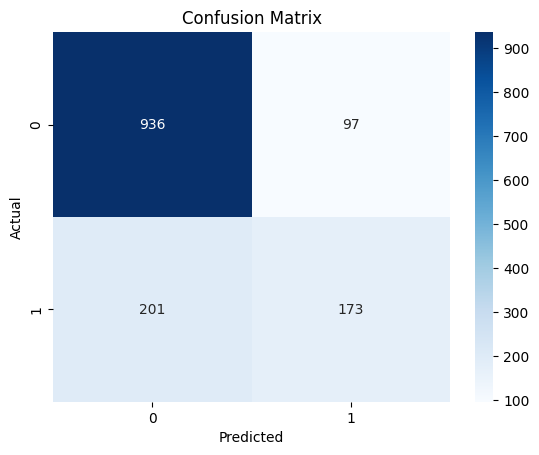

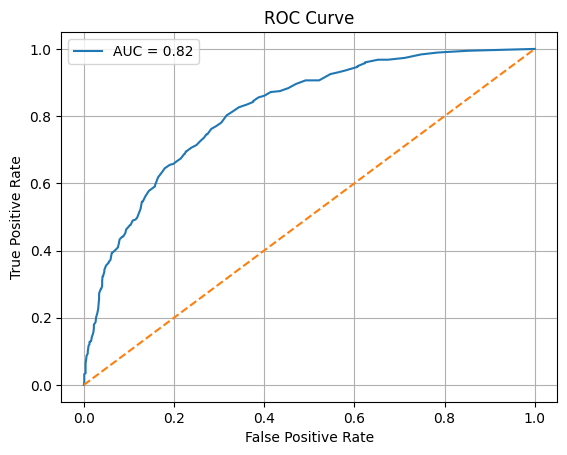

In [17]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

print("🌲 Random Forest Results")
evaluate_model(rf, X_test, y_test)


C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:51:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


⚡ XGBoost Results
Accuracy: 0.774
ROC AUC Score: 0.8108

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85      1033
           1       0.59      0.50      0.54       374

    accuracy                           0.77      1407
   macro avg       0.71      0.69      0.69      1407
weighted avg       0.76      0.77      0.77      1407



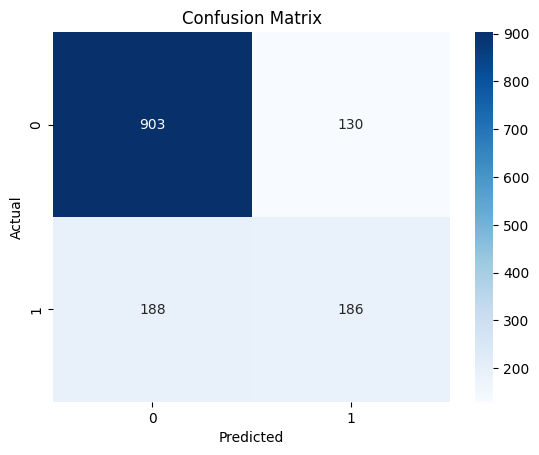

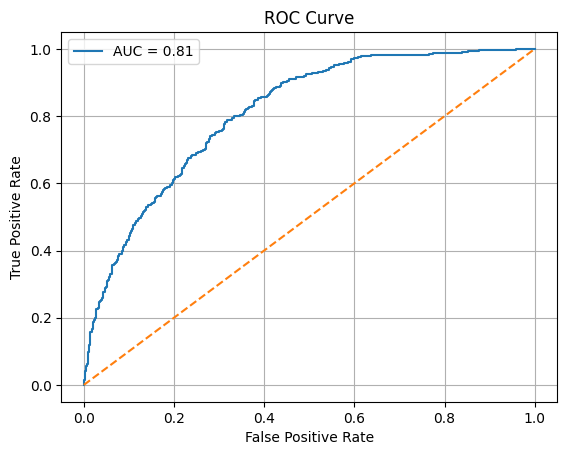

In [18]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

print("⚡ XGBoost Results")
evaluate_model(xgb, X_test, y_test)


In [19]:
models = {
    'Logistic Regression': logreg,
    'Random Forest': rf,
    'XGBoost': xgb
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    print(f"{name}: Accuracy = {acc:.4f}, AUC = {auc:.4f}")


Logistic Regression: Accuracy = 0.7868, AUC = 0.8321
Random Forest: Accuracy = 0.7882, AUC = 0.8173
XGBoost: Accuracy = 0.7740, AUC = 0.8108


# Hyperparameter Tuning

Fitting 3 folds for each of 48 candidates, totalling 144 fits
✅ Best Random Forest Params: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
📊 Tuned Random Forest Results:
Accuracy: 0.7974
ROC AUC Score: 0.8317

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1033
           1       0.66      0.48      0.56       374

    accuracy                           0.80      1407
   macro avg       0.75      0.70      0.71      1407
weighted avg       0.79      0.80      0.79      1407



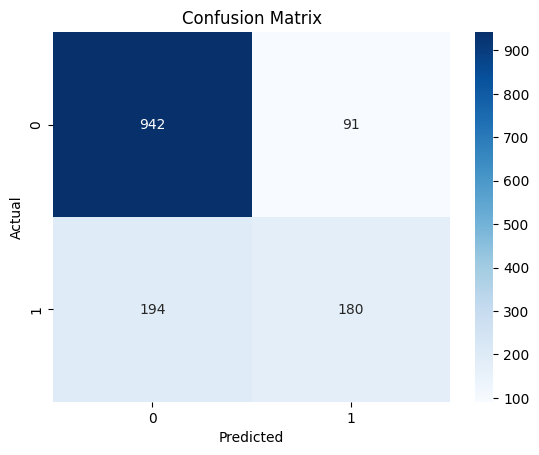

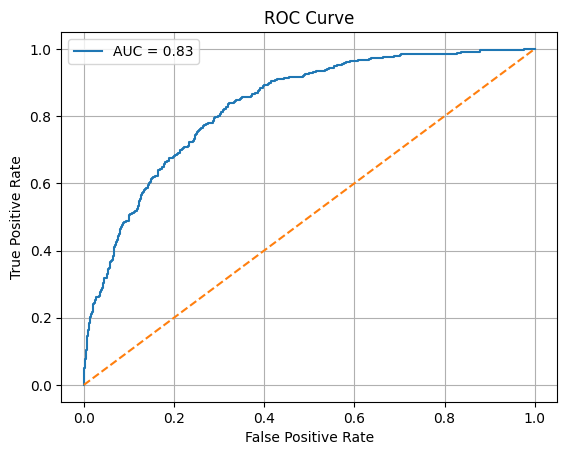

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Initialize model
rf = RandomForestClassifier(random_state=42)

# Grid search
grid_rf = GridSearchCV(rf, param_grid_rf, cv=3, scoring='roc_auc', n_jobs=-1, verbose=2)
grid_rf.fit(X_train, y_train)

# Best parameters
print("✅ Best Random Forest Params:", grid_rf.best_params_)

# Evaluate best model
print("📊 Tuned Random Forest Results:")
evaluate_model(grid_rf.best_estimator_, X_test, y_test)


Fitting 3 folds for each of 72 candidates, totalling 216 fits


C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:52:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Best XGBoost Params: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1}
📊 Tuned XGBoost Results:
Accuracy: 0.7868
ROC AUC Score: 0.833

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.63      0.48      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407



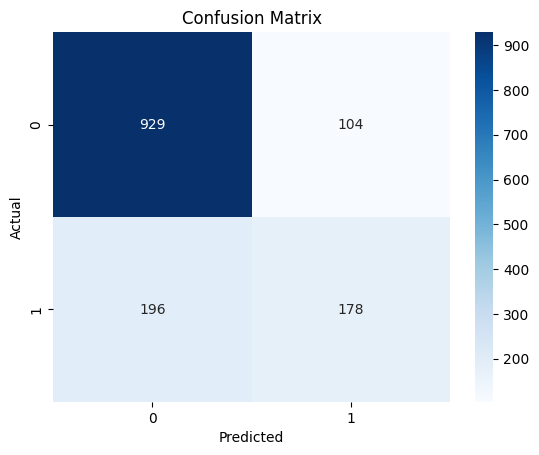

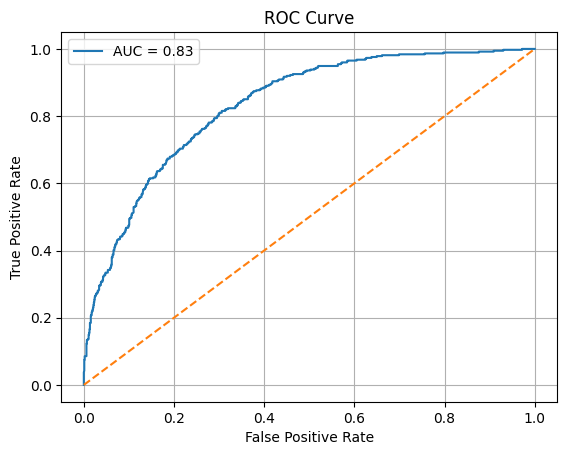

In [21]:
from xgboost import XGBClassifier

param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

grid_xgb = GridSearchCV(xgb, param_grid_xgb, cv=3, scoring='roc_auc', n_jobs=-1, verbose=2)
grid_xgb.fit(X_train, y_train)

print("✅ Best XGBoost Params:", grid_xgb.best_params_)

# Evaluate best model
print("📊 Tuned XGBoost Results:")
evaluate_model(grid_xgb.best_estimator_, X_test, y_test)


# AI with SHAP

In [22]:
import shap

# Load JavaScript visualizer
shap.initjs()

# Create Tree Explainer for XGBoost
best_model = grid_xgb.best_estimator_
explainer = shap.Explainer(best_model)


In [23]:
# Calculate SHAP values for test set
shap_values = explainer(X_test)


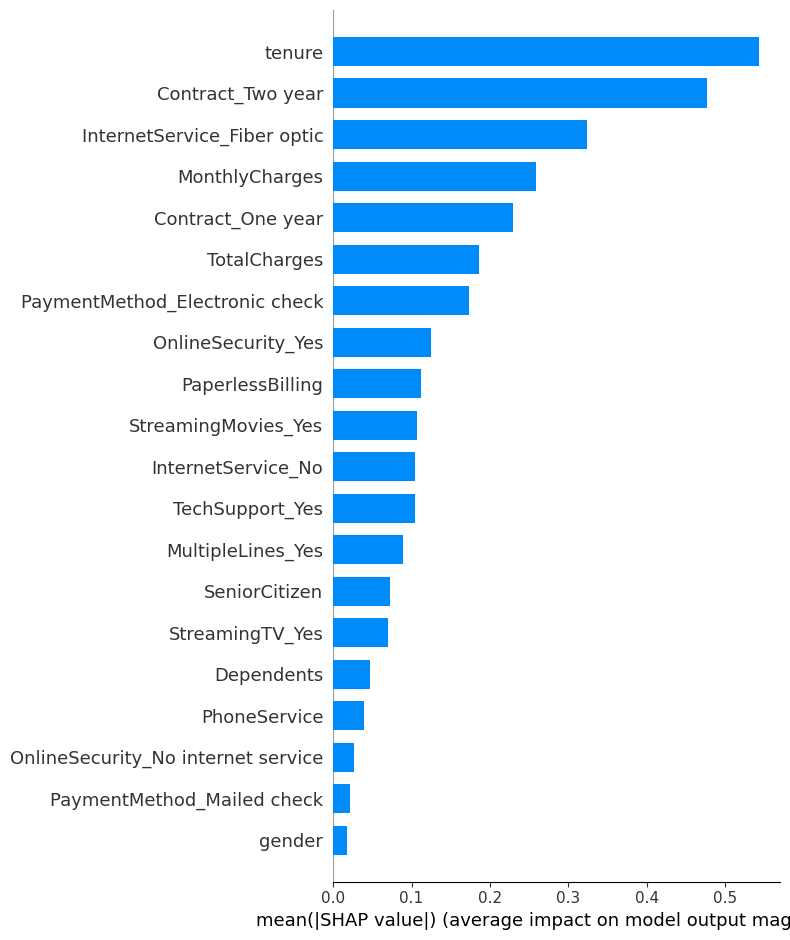

In [24]:
# Summary plot - shows top features
shap.summary_plot(shap_values, X_test, plot_type="bar")


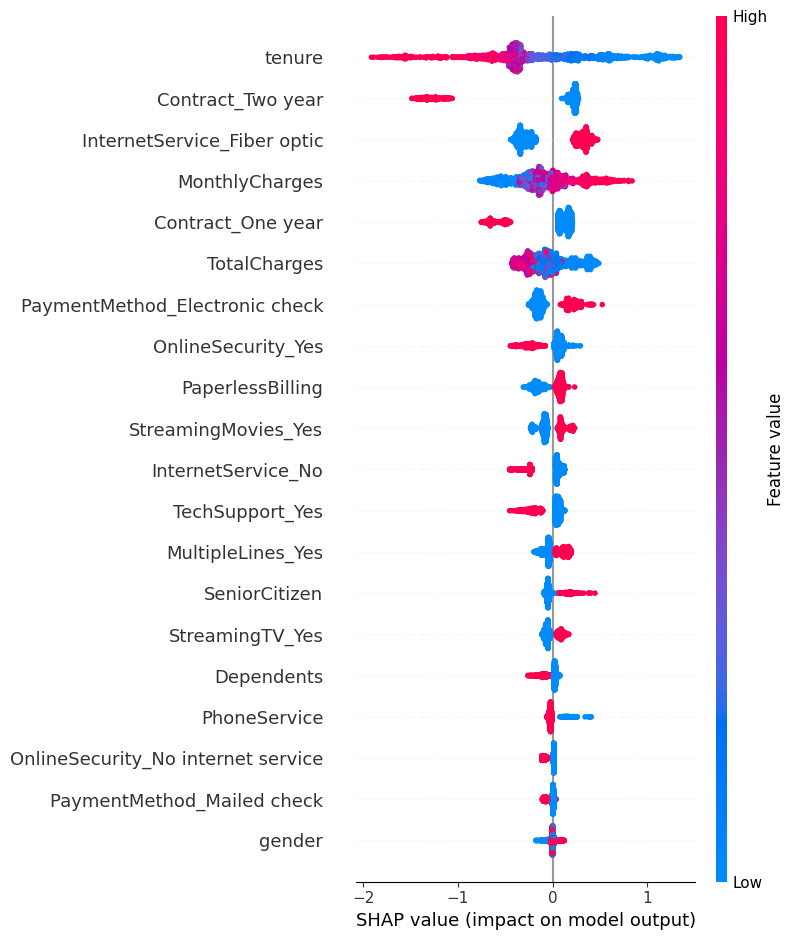

In [25]:
# Beeswarm plot
shap.summary_plot(shap_values, X_test)


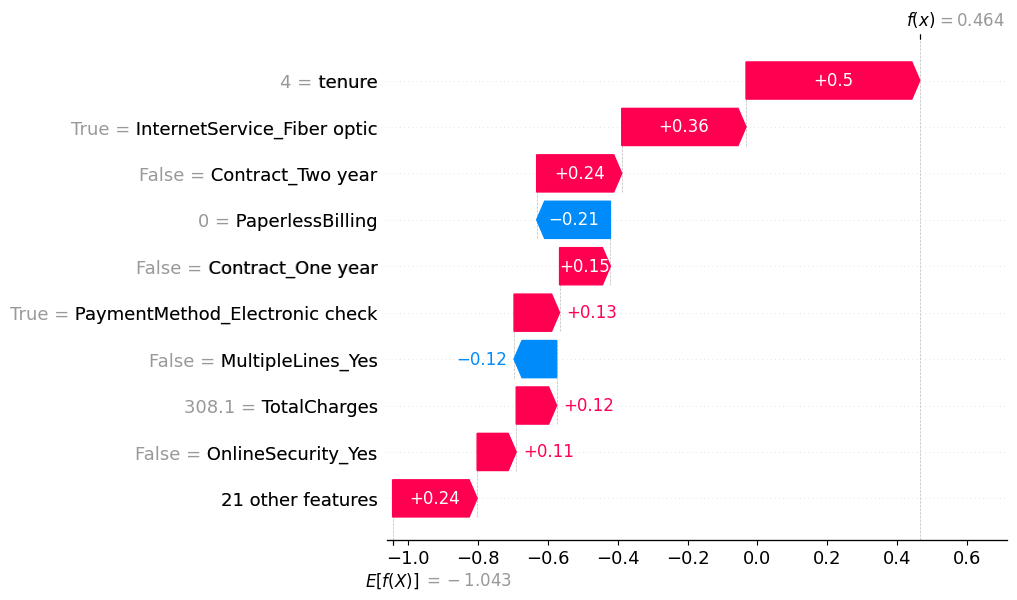

In [26]:
# Pick one example (e.g., 10th sample in test set)
index = 10

# Force plot for single prediction
shap.plots.waterfall(shap_values[index])


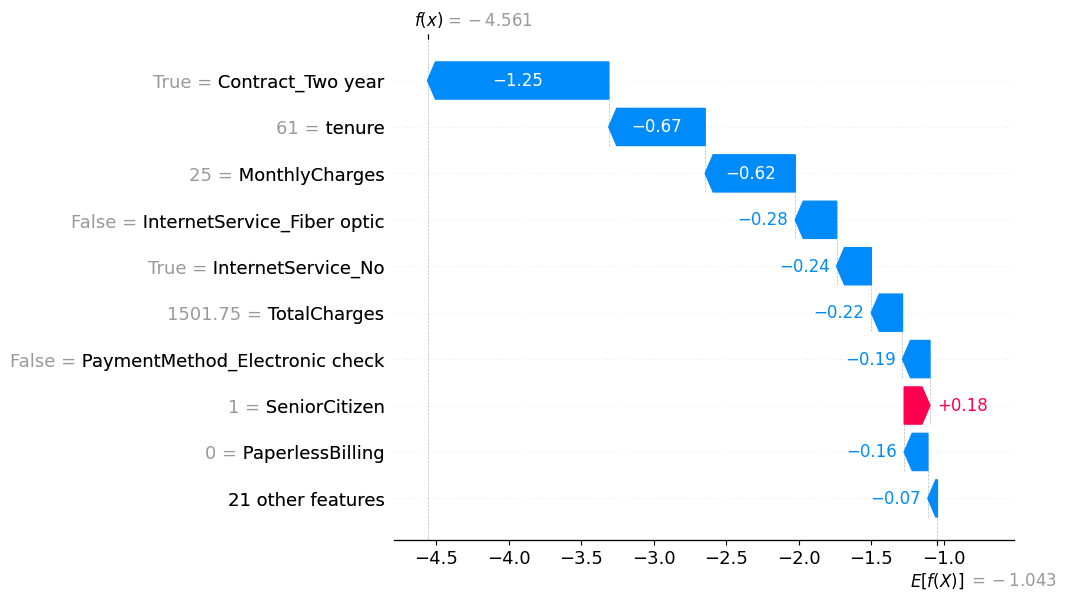

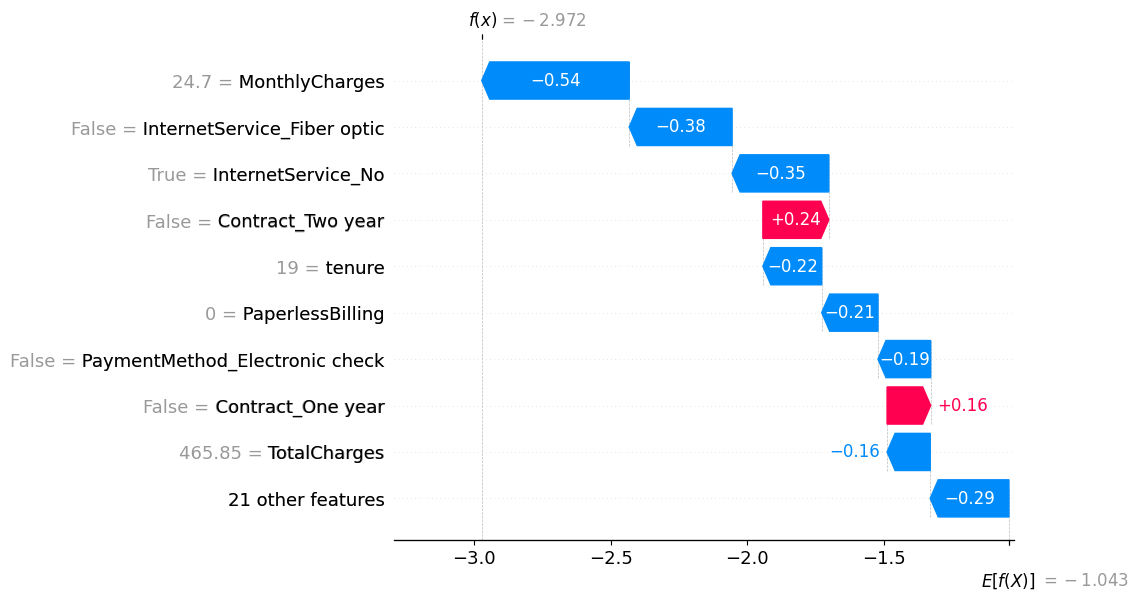

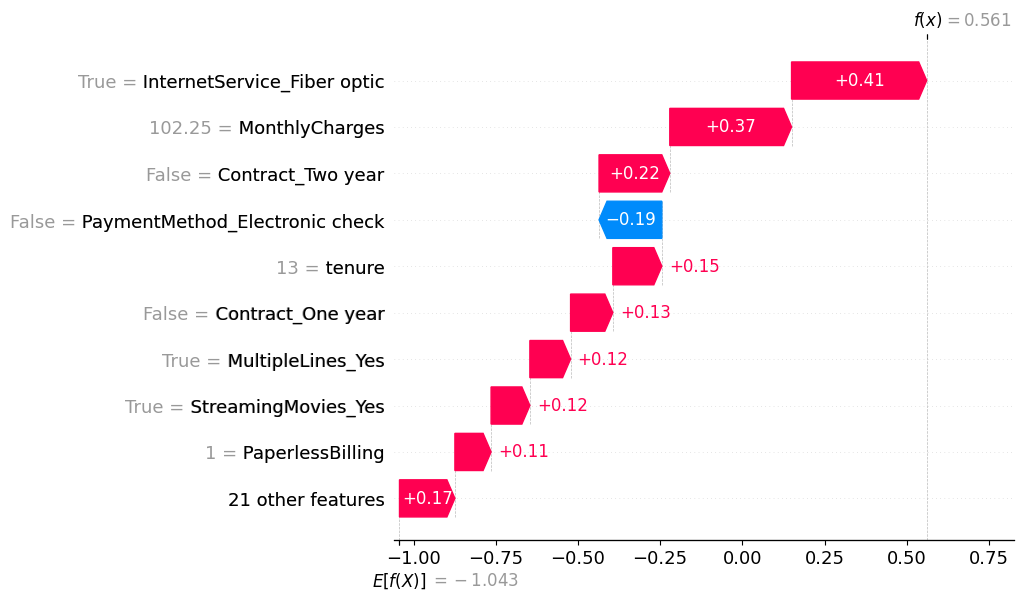

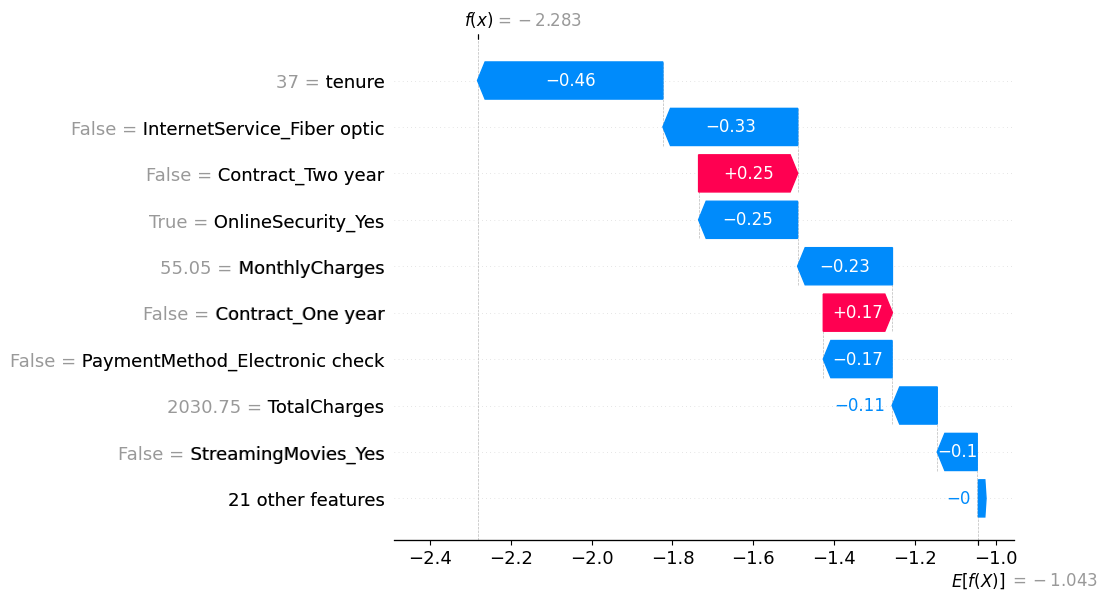

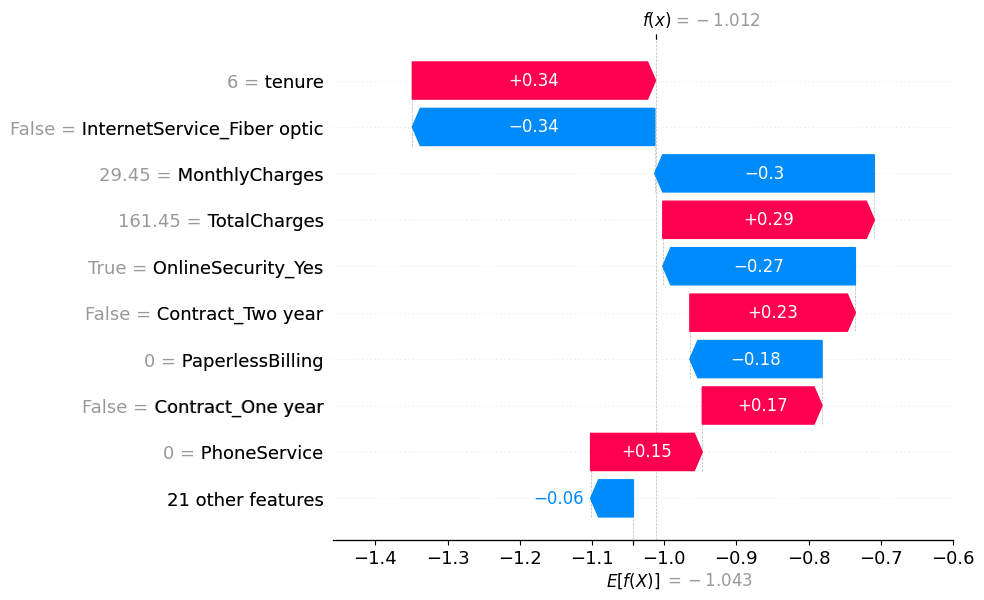

In [27]:
# Force plots for first 5 predictions (you can loop this)
for i in range(5):
    shap.plots.waterfall(shap_values[i])


# Customer Segmentation using Clustering (KMeans)

In [28]:
features_for_clustering = X[['tenure', 'MonthlyCharges', 'TotalCharges']]


In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)


In [30]:
from sklearn.cluster import KMeans

# Try 3 clusters: Low, Medium, High churn risk
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to original dataframe
X['ChurnCluster'] = clusters


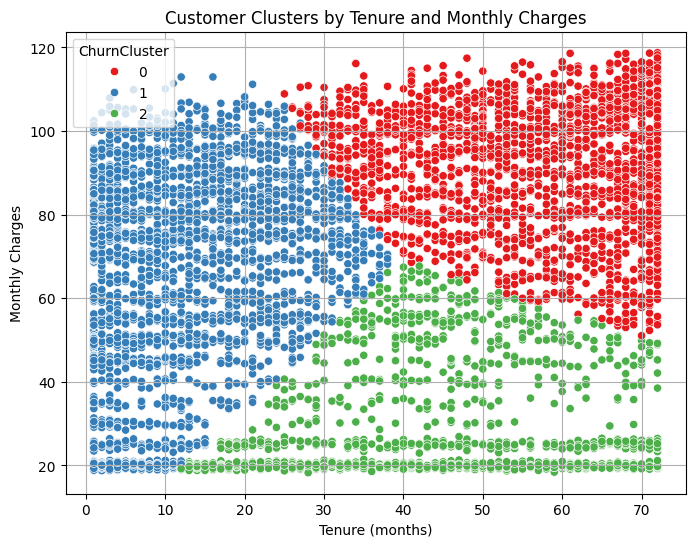

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

X_plot = X.copy()
X_plot['Churn'] = y  # Add target back for visualization

plt.figure(figsize=(8,6))
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='ChurnCluster', data=X_plot, palette='Set1')
plt.title('Customer Clusters by Tenure and Monthly Charges')
plt.xlabel('Tenure (months)')
plt.ylabel('Monthly Charges')
plt.grid(True)
plt.show()


In [32]:
# View average stats per cluster
cluster_summary = X_plot.groupby('ChurnCluster')[['tenure', 'MonthlyCharges', 'TotalCharges']].mean()
print(cluster_summary)

# View churn rate in each cluster
print(X_plot.groupby('ChurnCluster')['Churn'].mean())


                 tenure  MonthlyCharges  TotalCharges
ChurnCluster                                         
0             57.134537       91.568871   5223.116817
1             10.791692       62.579632    752.216109
2             44.410605       29.533990   1339.258906
ChurnCluster
0    0.167043
1    0.424387
2    0.053705
Name: Churn, dtype: float64


# Retention Strategy Engine

In [33]:
# Predict churn on test set using best model
y_pred_proba = grid_xgb.best_estimator_.predict_proba(X_test)[:,1]

# Recombine X_test with predictions and cluster labels
results = X_test.copy()
results['Churn_Probability'] = y_pred_proba
results['Churn_Prediction'] = (y_pred_proba >= 0.5).astype(int)
results['Actual_Churn'] = y_test.values
results['ChurnCluster'] = X.loc[X_test.index, 'ChurnCluster']


In [34]:
def get_recommendation(row):
    prob = row['Churn_Probability']
    cluster = row['ChurnCluster']
    tenure = row['tenure']
    charges = row['MonthlyCharges']
    
    # Example rules:
    if prob > 0.75:
        if cluster == 0:
            return "🔥 High risk — Offer 30% discount + Support Call"
        elif cluster == 2:
            return "⚠️ Medium risk — Offer loyalty reward"
        else:
            return "🔥 High risk — Call and offer custom package"
    
    elif 0.5 < prob <= 0.75:
        if tenure < 12:
            return "🎁 Offer 15% discount for 6 months"
        else:
            return "📞 Follow-up call from support team"
    
    elif 0.3 < prob <= 0.5:
        return "👍 Send appreciation email and optional bonus"
    
    else:
        return "✅ Low risk — No action needed"


In [35]:
results['Retention_Recommendation'] = results.apply(get_recommendation, axis=1)
results[['Churn_Probability', 'Churn_Prediction', 'Retention_Recommendation']].head(10)


,Churn_Probability,Churn_Prediction,Retention_Recommendation
2476,0.010342,0,✅ Low risk — No action needed
6773,0.048688,0,✅ Low risk — No action needed
6116,0.636580,1,📞 Follow-up call from support team
3047,0.092570,0,✅ Low risk — No action needed
4092,0.266592,0,✅ Low risk — No action needed
3218,0.443033,0,👍 Send appreciation email and optional bonus
3768,0.177117,0,✅ Low risk — No action needed
3463,0.688343,1,📞 Follow-up call from support team
3414,0.143362,0,✅ Low risk — No action needed
1192,0.045233,0,✅ Low risk — No action needed


In [36]:
# Sample churners and what to do
churners = results[results['Churn_Prediction'] == 1]
churners[['Churn_Probability', 'ChurnCluster', 'tenure', 'MonthlyCharges', 'Retention_Recommendation']].head(10)


,Churn_Probability,ChurnCluster,tenure,MonthlyCharges,Retention_Recommendation
6116,0.636580,1,13,102.25,📞 Follow-up call from support team
3463,0.688343,1,15,91.50,📞 Follow-up call from support team
2168,0.613935,1,4,86.05,🎁 Offer 15% discount for 6 months
1971,0.889352,1,1,93.55,🔥 High risk — Call and offer custom package
1078,0.663185,0,46,98.85,📞 Follow-up call from support team
4315,0.647987,1,2,70.15,🎁 Offer 15% discount for 6 months
4147,0.662209,1,6,74.90,🎁 Offer 15% discount for 6 months
6479,0.817835,1,1,69.50,🔥 High risk — Call and offer custom package
1201,0.848102,1,1,74.90,🔥 High risk — Call and offer custom package
576,0.545056,1,9,70.50,🎁 Offer 15% discount for 6 months


In [38]:
results.to_csv("WA_Fn-UseC_-Telco-Customer-Churn (1).csv", index=False)


In [45]:
import joblib
joblib.dump(grid_xgb.best_estimator_, 'models/xgb_model.pkl')

['models/xgb_model.pkl']

In [46]:
joblib.dump(scaler, 'models/scaler.pkl')
joblib.dump(kmeans, 'models/kmeans.pkl')


['models/kmeans.pkl']